# Monte-Carlo &mdash; Introduction

## Introduction

Monte Carlo methods are nowadays widely used, from the integration of multi-dimensional integrals to solving ab initio problems in chemistry, physics, medicine, biology, or even Dow-Jones forecasting. Computational finance is one of the novel fields where Monte Carlo methods have found a new field of applications, with financial engineering as an emerging field.

Numerical methods that are known as Monte Carlo methods can be loosely described as statistical simulation methods, where statistical simulation is defined in quite general terms to be any method that utilizes sequences of random numbers to perform the simulation. A central algorithm in Monte Carlo methods, called the Metropolis algorithm, is ranked as one of the top ten algorithms in the last century. 

 * Statistical simulation methods may be contrasted to conventional numerical discretization methods, which typically are applied to ordinary or partial differential equations that describe some underlying physical or mathematical system. 
 * In many applications of Monte Carlo, the physical process is simulated directly, and there is no need to even write down the differential equations that describe the behavior of the system. 
 * The only requirement is that the physical (or mathematical) system be described by probability distribution functions (PDF's). Once the PDF's are known, the Monte Carlo simulation can proceed by random sampling from the PDF's. 
   * As we shall see much of our effort is based around efficient techniques for sampling an arbitrary PDF.
 * Many simulations are then performed (multiple "trials" or "histories") and the desired result is taken as an average over the number of observations (which may be a single observation or perhaps millions of observations). 
   * These simulations usually are ideal for parallelisation so utilise GPU/Multi-core efficiently. 
 * In many practical applications, one can predict the statistical error (the "variance") in this average result, and hence an estimate of the number of Monte Carlo trials that are needed to achieve a given error.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

from numpy.random import default_rng
rng = default_rng()

## Application &mdash; Crude Integration

Consider the problem of evaluating the definite integral
$$
I=\int_{0}^{1} f(x) \ \mathrm{d} x
$$

We have used [scipy.integrate.quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) method which approximates the integral using a weighted sum of function values, i.e.,
$$
I=\int_{0}^{1} f(x) d x \approx \sum_{i=1}^{N} \omega_{i} f\left(x_{i}\right)
$$

where $w_i$ are the weights determined by the specific integration method (like Simpson's or Taylor's methods) with $x_i$ the given mesh points.

Alternatively, consider the expected value of the function $f$ for a given PDF $p(x)$, defined as
$$
\langle f\rangle=\frac{1}{N} \sum_{i=1}^{N} f\left(x_{i}\right) p\left(x_{i}\right)
\qquad\text{or}\qquad
\langle f\rangle= \int_{0}^{1} f\left(x\right) p\left(x\right)\ \mathrm{d} x
$$
where we use angle brackets, $\langle \bullet\rangle$, to represent expectation.

Now if we identify $p(x)$ with the uniform distribution, i.e. set $p(x) = 1$ when $x\in [0, 1]$ and zero for all other values, then the integral reduces to the average of $f$ over the interval $x\in [0, 1]$.
$$
    I=\int_{0}^{1} f(x) d x \approx\langle f\rangle
$$

In addition to the average value $\langle f\rangle$ the other important quantity in a Monte-Carlo calculation is the variance, $\sigma^2$, and the standard deviation $\sigma$. We define first the variance of the integral with $f$ for a uniform distribution in the interval $x\in[0, 1]$ to be
$$
\sigma^{2}=\frac{1}{N} \sum_{i=1}^{N}\bigg(f\left(x_{i}\right)-\langle f\rangle\bigg)^{2} p\left(x_{i}\right)
$$
or 
$$
\sigma^{2}=\left(\left\langle f^{2}\right\rangle-\langle f\rangle^{2}\right)
$$

The standard deviation decays proportional to $1/\sqrt{N}$, which give an estimate for the error in the integral. This does not  compare favourably against discretisation methods such as Trapezoidal, Simpson's etc where the error bound is $N^{-k}$ for where $k \ge 1$ is the order of the method. However, Monte Carlo integration is more efficient in higher dimensions since the error bound in Monte Carlo is independent of dimension, $d$, but the error bound in the traditional discretisation methods is $N^{-k/d}$, so Monte Carlo methods become more efficent than a traditional order-$k$ algorithm for dimensions $d > 2k$.

### Question 1

Evaluate, using Monte Carlo integration
$$
    I \int_{0}^{1} \frac{4}{1+x^{2}} \ \mathrm{d}x \quad (= \pi)
$$

**Algorithm**

 * Choose the number of Monte Carlo samples $N$.
 * Perform a loop over $N$ and for each step
    * Generate a a random number $x_i$ in the interval $[0, 1]$ via a call to a random number generator.
    * Evaluate $f(x_i)$.
    * Evaluate the contributions to the mean value and the standard deviation for each loop.
 * After *N* samples calculate the final mean value and the standard deviation.

**Implementation**

Define function 
~~~python
def crude_mc(f, a, b, n, rng):
~~~
to estimate the integral of function $f$ over the interval $[a,b]$ using $n$ function evaluations generated using the `rng` random number generator. Returns both estimate and variance.

In [2]:
# Answer

f = lambda x: 4 / (1+x**2)

def crude_mc(f, a, b, n, rng):
    
    # TODO
    return 0,0

crude_mc(f, 0, 1, 100, rng)

(0, 0)

In [3]:
print('%8s %15s %12s %12s' % ('N', 'integral', 'variance', 'error'))
print('-' * 50)

for n in [10**k for k in range(1,6)]:
    integral, variance = crude_mc(f, 0, 1, n, rng) 
    error = np.pi-integral
    print(f"{n:8d} {integral:15.8e} {variance:12.3e} {error:12.3e}")

       N        integral     variance        error
--------------------------------------------------
      10  0.00000000e+00    0.000e+00    3.142e+00
     100  0.00000000e+00    0.000e+00    3.142e+00
    1000  0.00000000e+00    0.000e+00    3.142e+00
   10000  0.00000000e+00    0.000e+00    3.142e+00
  100000  0.00000000e+00    0.000e+00    3.142e+00


In [4]:
%%timeit 
crude_mc(f, 0, 1, 1_000_000, rng)

143 ns ± 11.5 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


### Question 2

Speed up implementation by removing the `for` loop and generate all random values in a single call.

In [5]:
# Answer
def crude_mc_2(f, a, b, n, rng):
    
    # TODO
    return 0, 0

In [6]:
%%timeit 
crude_mc_2(f, 0, 1, 1_000_000, rng)

126 ns ± 1.46 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


### Question 3 

Implement a function 
~~~python
def trap(f, a, b, n):
~~~
that uses the [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule) to estimate the integral of $f$ over $[a,b]$ and compare its accuracy with Monte Carlo simulation.

The trapezoidal rule for $f$ over $[a,b]$ is 
$$
\int_{a}^{b} f(x) \ \mathrm{d} x 
 = h \bigg[
     f\left(x_{1}\right) + f\left(x_{2}\right) + f\left(x_{3}\right) + f\left(x_{4}\right) + \cdots 
         + f\left(x_{N-1}\right)
       \bigg] 
   + \frac{h}{2} \bigg[ f\left(x_{0}\right) +f\left(x_{N}\right)\bigg]
$$
where $h=(b-a)/N$ and $x_k=a + k \times h$ (so $x_0=a$ and $x_N=b$).


In [7]:
def trap(f, a, b, n):
    
    # TODO
    return 0


trap(f,0, 1, 1000) 

0

In [8]:
print('%8s %15s %12s' % ('N', 'integral', 'error'))
print('-' * 50)

for n in [10**k for k in range(1,6)]:
    integral = trap(f, 0, 1, n) 
    error = np.pi-integral
    print(f"{n:8d} {integral:15.8e}  {error:12.3e}")

       N        integral        error
--------------------------------------------------
      10  0.00000000e+00     3.142e+00
     100  0.00000000e+00     3.142e+00
    1000  0.00000000e+00     3.142e+00
   10000  0.00000000e+00     3.142e+00
  100000  0.00000000e+00     3.142e+00


## Application &mdash; Particles in a box

In this example we show how a system evolves towards a well defined equilibrium state.

Consider a box divided into two equal halves separated by a wall. Then 
At the beginning, time $t = 0$, there are $N$ particles on the left side. 
A small hole in the wall is then opened and one particle can pass through the hole per unit time.
After some time the system reaches its equilibrium state with equally many particles in both halves, $N/2$. 
Instead of determining complicated initial conditions for a system of $N$ particles, we model the system by a simple statistical model: 
 * In order to simulate this system, which may consist of $N \gg 1$ particles, we assume that all particles in the left half have equal probabilities of going to the right half. 
 * Let $n_l$ denote the number of particles at every time on the left side, and $n_r = N-n_l$ the number of particles on the right side. 
 * The probability for a move to the right during a time step $\Delta t$ is $n_l/N$. 
 

### Question 4

Simulate the behaviour of $n=1000$ particles over $t_{max}=10n$ time steps, and compare state history with deterministic model of
$$
    n_l(t) = \frac{n}{2} \bigg(1+\mathrm{e}^{-2t/n}\bigg)
$$

The algorithm for simulating this problem may then look like as follows:

**Algorithm**

 * Choose the number of particles, $N$.
 * Make a loop over time, where the maximum time should be larger than the number of particles, $N$.
     * For every time step, $\Delta t$, there is a probability $n_l/N$ for a move to the right. Compare this probability
with a random number $x$ sampled from $\sim {\cal U}(0,1)$.
     * If $x \le n_l/N$, move a particle form the left half to the right (i.e, decrease the number of particles in the left by one), otherwise move a particle from the right half to the left.

**Implementation**

Define function 
~~~python
def simulate(n, t_max, rng):
~~~
which implement the above algorithm and returns an array of length $t_{max}+1$ containing the number of particles in the left half for time steps $0,1,\ldots,t_{max}$.

In [9]:
# Answer
def simulate(n, t_max, rng):
    
    # TODO
    return np.array([0])

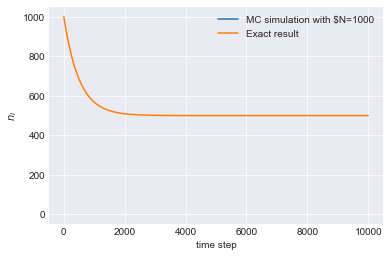

In [10]:
n = 1000
t_max = 10 * n

plt.plot(simulate(n, t_max, rng), label='MC simulation with $N=%s' % n)
plt.plot(n/2 * (1+np.exp(-2*np.arange(t_max)/n)), label='Exact result')
plt.ylabel('$n_l$')
plt.xlabel('time step')
plt.legend()
plt.show()

## Appplication &mdash; Radioactive decay

Radioactive decay is among one of the classical examples on use of Monte-Carlo simulations. 
Assume that a the time $t = 0$ we have $N(0)$ nuclei of type X which can decay radioactively. 
At a time $t > 0$ we are left with $N(t)$ nuclei. 
With a transition probability $\omega$, which expresses the probability that the system will make a transition to another state during a time step of one second, we have the following first-order differential equation
$$
d N(t)=-\omega N(t) d t
$$
with solution 
$$
N(t)=N(0) e^{-\omega t}
$$
where we have defined the mean lifetime $\tau$ of $X$ as
$$
\tau=\frac{1}{\omega}
$$

If a nucleus X decays to a daughter nucleus Y which also can decay we get the following coupled equations
$$
\frac{d N_{X}(t)}{d t}=-\omega_{X} N_{X}(t)
\qquad\text{and}\qquad
\frac{d N_{Y}(t)}{d t}=-\omega_{Y} N_{Y}(t)+\omega_{X} N_{X}(t)
$$

And so on for more complicated situations.  In contrast 

### Question 5 (Single Nucleus Decay - Deterministic)

Model the decay of $n=1000$ particles up to time $t_{max}=50$ steps with $\omega=0.05$ using a differential equation.

 * Define array, `t`, to store the time points using `np.linspace` from 0 to $t_{max}$.
 * Define a function to represent the rhs of the above differential equation.
 * Using `scipy.integrate.odeint` to generate the required solution, save result as array, $u$.


In [11]:
# Answer

n = 1000
t = np.array(0)
u = np.array(0)

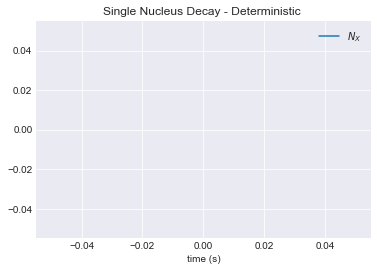

In [12]:
plt.plot(t, u/n, label='$N_X$')
plt.xlabel('time (s)')
plt.legend()
plt.title("Single Nucleus Decay - Deterministic ")
plt.show()

### Question 6 (Single Nucleus Decay - Monte Carlo)

Model the decay of $n=1000$ particles up to time $t_{max}=50$ steps with $\omega=0.05$ using Monte Carlo simulation.

**Algorithm**

 * Define zero array `result` of size `t_max + 1`. On return, `result[k]` will store the average number of unstable particles at time step `k`.
 * Loop over `n_samples`, where `n_samples` is the number of independent Monte Carlo samples.  For each sample:
    * Initialse sample by setting `n_unstable` equal to `n`, and `total` equal to zero.
    * Loop over each time step up to `t_max`. For each time step:
       * Loop over each of the currently `n_unstable` particles. For each particle:
           * Sample `x` from $\sim {\cal U}(0,1)$, and decay particle if `x` is less than $\omega$.
       * Add `n_unstable` to `total`.
    * Save average number of unstable particles, `total/n_samples` to `result`.
 * Return array `result`


In [13]:
# TODO
def mc_sampling(n, t_max, n_samples, decay_probability, rng):
    return np.array([0])
u_mc = mc_sampling(n, 50, 10, 0.05, rng)

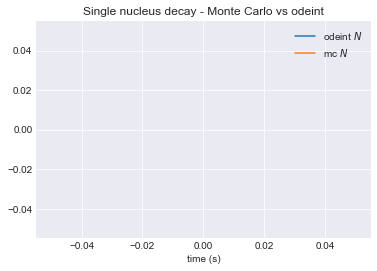

In [14]:
# MC and ode-solution give comparable results

plt.plot(t, u/n, label='odeint $N$')
plt.plot(u_mc/n, label='mc $N$')
plt.xlabel('time (s)')
plt.legend()
plt.title("Single nucleus decay - Monte Carlo vs odeint")
plt.show()

### Question 7 (Double Nuclei Decay - Deterministic)

Model the decay of $n=1000$ particles up to time $t_{max}=50$ steps with $\omega_Y = \omega_X = 0.05$ using a differential equation.

 * Define array, `t`, to store the time points using `np.linspace` from 0 to $t_{max}$.
 * Define a function to represent the rhs of the above differential equation.
 * Using `scipy.integrate.odeint` to generate the required solution, save result as array, $u$.

In [15]:
# TODO
u = np.array([0,0])

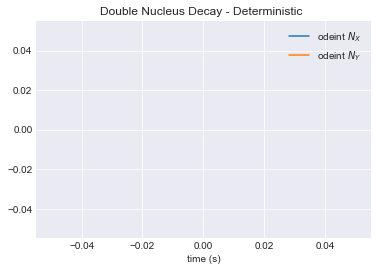

In [16]:
plt.plot(t, u.T[0]/n, label='odeint $N_X$')
plt.plot(t, u.T[1]/n, label='odeint $N_Y$')
plt.xlabel('time (s)')
plt.legend()
plt.title("Double Nucleus Decay - Deterministic ")
plt.show()

### Question 8 (Double Nuclei Decay - Monte Carlo)

Model the decay of $n=1000$ particles up to time $t_{max}=50$ steps with $\omega_Y = \omega_X = 0.05$ 
using Monte Carlo simulation.

**Algorithm**

 * Define zero array `result` of size `t_max + 1`. On return, `result[k]` will store the average number of unstable particles of X and of Y at time step `k`.
 * Loop over `n_samples`, where `n_samples` is the number of independent Monte Carlo samples.  For each sample:
    * Initialse sample by setting `n_unstable` equal to `n`, and `total` equal to zero.
    * Loop over each time step up to `t_max`. For each time step:
       * Loop over each of the currently `n_unstable` particles. For each particle:
           * Sample `x` from $\sim {\cal U}(0,1)$, and decay particle from X to Y if `x` is less than $\omega_X$.
           * Sample `x` from $\sim {\cal U}(0,1)$, and decay particle from Y if `x` is less than $\omega_Y$.
       * Add `n_unstable` to `total`.
    * Save average number of unstable particles, `total/n_samples` to `result`.
 * Return array `result`


In [17]:
# Answer
def mc_sampling(n, t_max, n_samples, decay_probability, rnd):
    return np.array([0,0])

u2_mc = mc_sampling(n, 50, 10, 0.05, rng)  

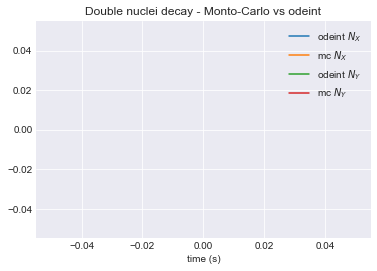

In [18]:
plt.plot(t, u.T[0]/n, label='odeint $N_X$')
plt.plot(u2_mc.T[0]/n, label='mc $N_X$')

plt.plot(t, u.T[1]/n, label='odeint $N_Y$')
plt.plot(u2_mc.T[1]/n, label='mc $N_Y$')

plt.title("Double nuclei decay - Monto-Carlo vs odeint")

plt.xlabel('time (s)')
plt.legend()
plt.show()